# DATA WRANGLING PROJECT 

# Student Name & ID:
 1. Siddharth Raj Saravanan - 12198198
 2. Subash Chander Swaminathan - 69873432
 3. Santhosh Balaaji Sowrirajalu Ramamurthy - 83451338
 4. Joel Mathew - 59414071
 
## Crime Stats
This notebook consists of the wrangling involved in `Crime Stats`

## Section 1: `Wrangling the Crime Data`

The steps are as follows:
 1. Loading and renaming the dataset
 2. Aggregating the columns
 3. Reshaping the dataframe into common structure
 4. Export into csv

In [1]:
#Loading the required libraries:
library (tidyverse)
library(lubridate)
library(zoo)
library(ggplot2)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




### Loading and Renaming the dataset

In [2]:
#Loading the file and selecting the columns

base_csv <- read_csv( "ARG_data.csv")

unclean_df <- base_csv %>% select(c(24,15,4))

unclean_df <- rename(unclean_df, Date = "Year Month", CrimeType = "Anzsoc Subdivision", 
                     PoliceStation = "Police Station",
                    )
unclean_df %>% glimpse()

Parsed with column specification:
cols(
  .default = col_character(),
  `Weapons filter` = col_logical(),
  `Number of Records` = col_double(),
  Victimisations = col_double()
)

See spec(...) for full column specifications.



Observations: 613,549
Variables: 3
$ Date          <chr> "7/1/2014", "7/1/2014", "7/1/2014", "7/1/2014", "7/1/...
$ PoliceStation <chr> "Kamo CPC", "Dunedin South", "Invercargill Central", ...
$ CrimeType     <chr> "Assault", "Assault", "Assault", "Assault", "Assault"...


### Aggregating the columns

In [3]:
#creating a function to add Year, Month, Quarter and aggregate the columns

add_ymq <- function(df){
            df %>%
                mutate(Year = year(df$Date), 
                       Month = month(df$Date),
                       Quarter = as.yearqtr(df$Date, format = "%Y-%m-%d")) %>%
                select(-c("Date")) %>%  #removing the "Date" column
                select(c(3,4,5,1,2))  #swlwcting the column in the required order
    }

wrangle_crime <- function(df) {
df %>% 
    mutate(Date = as.Date(Date,"%m/%d/%Y")) %>% 
    add_ymq() %>% 
    group_by(Year,Month,Quarter,PoliceStation) %>%
    summarise(CrimeCount = n())   #Counting the number of crimes
    }

### Reshaping the dataframe into common structure
so that it can be used in the data model with the rest of the enities.

In [4]:
final <- unclean_df %>% wrangle_crime() #using the created function to wrangle the data

final %>% head()

Year Month Quarter PoliceStation    CrimeCount
1 2014 7     2014 Q3 Akaroa            6        
2 2014 7     2014 Q3 Alexandra         7        
3 2014 7     2014 Q3 Amberley          7        
4 2014 7     2014 Q3 Arthurs Pass      1        
5 2014 7     2014 Q3 Ashburton        45        
6 2014 7     2014 Q3 Auckland Airport 17

The below code can be executed if you want to see the output of the data after cleaning.

In [5]:
#Export the dataframe to a csv format

#write_csv(final,"Crime_cleaned.csv")

## Section 2: Web Scraping in Julia

Since the data we have now does not contain NZ_city information but Police Station only, we cannot map it to the International visitors data. So, we are going to scrap the address of the each police station from a webpage and use it to map with the International visitors data with the City as a key field.

#### `Refer the notenook attached "PoliceStation_Info-Julia.pynb" to get the web scraped data frame`

Execute the julia notebook and continue with the section 3 of 'Crime.ipynb'

## Section 3: Merging the Two datasets

Loading the exported file that was created using Julia from web scraping to wrangle further.

The steps are as follows:
 1. Loading the dataset
 2. Data Cleaning
 3. Merging the datasets
 3. Reshaping the dataframe into common structure
 4. Export into csv

### Loading the dataset

In [6]:
# Reading the scraped file in CSV file format to police_data dataframe

police_data = read_csv("Police_City_Output.csv")

Parsed with column specification:
cols(
  Police_station = col_character(),
  address = col_character()
)



### Data Cleaning

In [7]:
# Seperate the address into number, suburb and NZ_City using "," seperator

police_df <- police_data %>%
                  separate(address, c("number", "suburb", "NZ_City"), ",")
police_df %>% glimpse

Warning message:
"Expected 3 pieces. Additional pieces discarded in 12 rows [11, 29, 73, 77, 139, 165, 187, 233, 265, 269, 311, 312]."
Warning message:
"Expected 3 pieces. Missing pieces filled with `NA` in 229 rows [2, 3, 4, 5, 7, 8, 9, 10, 14, 17, 18, 20, 21, 22, 23, 24, 26, 28, 31, 33, ...]."


Observations: 326
Variables: 4
$ Police_station <chr> "Air Support Unit", "Akaroa Police Station", "Alexan...
$ number         <chr> "\n            3 Solent St", "\n            9 Rue La...
$ suburb         <chr> "Mechanics Bay", "Akaroa", "Alexandra", "Amberley", ...
$ NZ_City        <chr> "Auckland", NA, NA, NA, NA, "Queenstown", NA, NA, NA...


In [8]:
# Replaced the missing values in NZ_City column with Missing 

join <- police_df %>%
            mutate(NZ_City = replace(NZ_City, is.na(NZ_City), "Missing"))

# Rows which has 'Missing' value in NA_City column

position <- join$NZ_City %in% "Missing"

# Replace the correct city name to respective police station 

police_df[position,c(4)] <- police_df[position,c(3)]
police_df[139,c(4)] <- police_df[139,c(3)]
police_df[269,c(4)] <- police_df[269,c(3)]
police_df[288,c(4)] <- police_df[288,c(3)]

# Selected the required columns from the police_df datafame

police_df <- police_df %>% select(Police_station,NZ_City)
police_df %>% head

Police_station                      NZ_City   
1 Air Support Unit                    Auckland  
2 Akaroa Police Station               Akaroa    
3 Alexandra Police Station            Alexandra 
4 Amberley Police Station             Amberley  
5 Armoury (National)                  Upper Hutt
6 Arrowtown Community Policing Centre Queenstown

In [9]:
# Renamed the city name as required format like in main dataset

old <- c("Police Station","Arthur\'s Pass","Auckland City District Headquarters","Beachlands Community Policing Base",
         "Christchurch Central","Fitzroy","Halfmoon Bay","Henderson Community Constable","Kaikorai Valley Community Policing Centre",
         "Kamo","Naenae Community Policing Centre","North Shore","Onerahi","Palmerston North Central","Papakura Central",
         "Pio Pio","Saint Andrews","Te Awamutu Central","Timaru Central","Whanganui Central","Whangarei Central",
         "Kotemaori","Pongaroa","Haast")

new <- c(" ","Arthurs Pass","Auckland Harbour Bridge","Beachlands CCB","Christchurch","Fitzroy CPC","Half-Moon Bay","Henderson",
         "Kaikorai Valley","Kamo CPC","Naenae","North Shore Policing Centre","Onerahi CPC","Palmerston North","Papakura","Piopio",
         "St Andrews","Te Awamutu","Timaru","Whanganui","Whangarei","Kotemaori","Pongaroa","Haast")

# Created the dataframe which will have the station name exisisting and new which needs to replace 

replace <- data.frame(old = old, new = new)

# Looped the n(number of record in replace) times and replace the station names

for(i in 1:nrow(replace))
{   
    police_df$Police_station <- gsub(replace[i,1], replace[i,2], police_df$Police_station)
}

# Replace the city name correctly  
    police_df$NZ_City <- gsub("Beachlands 2018","Beachlands", police_df$NZ_City)

# Replace the capital letter into lower case and changed the first letter to uppercase
    AUCKLAND = "AUCKLAND"
    CHRISTCHURCH = "CHRISTCHURCH"
    auckland = tolower(AUCKLAND) 
    substr(auckland,1,1) = toupper(substr(auckland,1,1))
    christchurch = tolower(CHRISTCHURCH) 
    substr(christchurch,1,1) = toupper(substr(christchurch,1,1))
    police_df$NZ_City <- gsub(AUCKLAND,auckland, police_df$NZ_City)
    police_df$NZ_City <- gsub(CHRISTCHURCH,christchurch, police_df$NZ_City)

In [10]:
# Added few names and city to dataframe

police_station <- c("Bell Block","Greytown","Manaia","Tauranga","Waipawa","Hamilton East","Havelock North","Christchurch Airport","Christchurch South","Hamilton Central","Tauranga South","Not Known")
NZ_City <- c("New Plymouth","Greytown","Manaia","Tauranga","Waipukurau","Hamilton","Havelock","Christchurch","Christchurch","Hamilton","Tauranga","Not Known")
police_missed <- data.frame(Police_station = police_station, NZ_City = NZ_City)
police_df <- rbind(police_df,police_missed)
police_df %>% head()

Police_station                      NZ_City   
1 Air Support Unit                    Auckland  
2 Akaroa                              Akaroa    
3 Alexandra                           Alexandra 
4 Amberley                            Amberley  
5 Armoury (National)                  Upper Hutt
6 Arrowtown Community Policing Centre Queenstown

### Merging the datasets

In [11]:
#Loading the Crime data and the web scraped which has been wrangled below

crime_stats <- final #from Section 1

police_city <- rename(police_df,PoliceStation = Police_station) #from Section 3

In [18]:
crime_full <- inner_join(crime_stats,police_city) %>% group_by(Year,Month,Quarter,NZ_City) %>% select("Year","Month","Quarter","NZ_City","PoliceStation","CrimeCount")

Joining, by = "PoliceStation"



In [19]:
crime_full %>% glimpse

Observations: 961
Variables: 6
Groups: Year, Month, Quarter, NZ_City [778]
$ Year          <dbl> 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,...
$ Month         <dbl> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,...
$ Quarter       <yearqtr> 2014 Q3, 2014 Q3, 2014 Q3, 2014 Q3, 2014 Q3, 2014...
$ NZ_City       <chr> "Auckland", "Beachlands", "New Plymouth", "Christchur...
$ PoliceStation <chr> "Auckland Harbour Bridge", "Beachlands CCB", "Bell Bl...
$ CrimeCount    <int> 1, 4, 17, 5, 85, 4, 254, 96, 16, 190, 37, 7, 66, 93, ...


In [20]:
crime_full %>% head

Year Month Quarter NZ_City      PoliceStation           CrimeCount
1 2014 7     2014 Q3 Auckland     Auckland Harbour Bridge  1        
2 2014 7     2014 Q3 Beachlands   Beachlands CCB           4        
3 2014 7     2014 Q3 New Plymouth Bell Block              17        
4 2014 7     2014 Q3 Christchurch Christchurch Airport     5        
5 2014 7     2014 Q3 Christchurch Christchurch South      85        
6 2014 7     2014 Q3 Greytown     Greytown                 4

### Export to CSV

Exporting the fully merged data in a common structure for further wrangling

In [21]:
write_csv(crime_full,"Crime.csv")

### Visualization and Inferences

Lets make some visualization from the final data to analyze further

In [22]:
#creating a dataframe for plotting bar chart
vis1_c <- crime_full %>% 
        select(Year,NZ_City,CrimeCount) %>% group_by(Year,NZ_City) %>% 
        summarise(Number_of_Crimes = sum(CrimeCount)) %>% arrange(desc(Number_of_Crimes)) %>%
        top_n(5)

vis1_c

Adding missing grouping variables: `Month`, `Quarter`

Selecting by Number_of_Crimes



Year NZ_City      Number_of_Crimes
1  2017 Hamilton     4926            
2  2018 Hamilton     4761            
3  2016 Hamilton     4407            
4  2015 Hamilton     3924            
5  2018 Tauranga     2888            
6  2019 Hamilton     2829            
7  2017 Tauranga     2764            
8  2017 Henderson    2492            
9  2018 Henderson    2457            
10 2016 Henderson    2420            
11 2016 Tauranga     2365            
12 2015 Tauranga     2244            
13 2015 Henderson    2211            
14 2014 Hamilton     2096            
15 2019 Tauranga     1707            
16 2018 Christchurch 1656            
17 2015 Christchurch 1458            
18 2017 Christchurch 1415            
19 2016 Christchurch 1414            
20 2019 Henderson    1403            
21 2014 Henderson    1130            
22 2014 Tauranga     1062            
23 2018 Naenae       1054            
24 2017 Naenae       1008            
25 2016 Naenae        957            
26 2019 Christchurch  926            
27 2015 Naenae        866            
28 2014 Christchurch  669            
29 2019 Naenae        598            
30 2014 Naenae        411

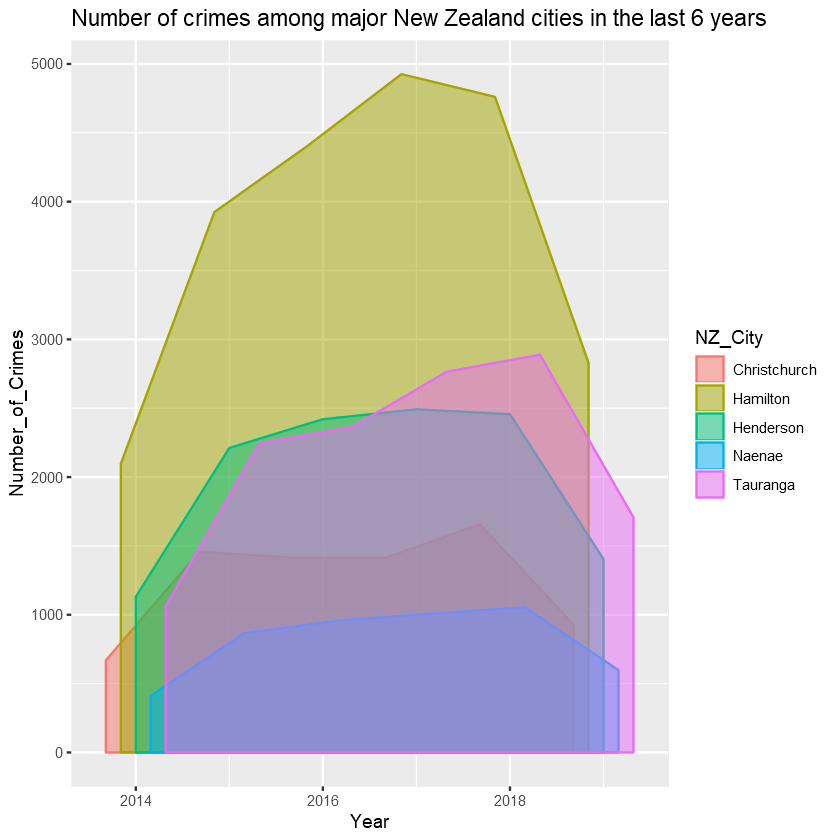

In [23]:
#A area chart that compares the number of crimes among major New Zealand cities in the last 6 years.

ggplot(vis1_c, aes(x = Year, y = Number_of_Crimes)) + 
  geom_area(aes(color = NZ_City, fill = NZ_City), 
            alpha = 0.5, position = position_dodge(0.8)) +
  ggtitle("Number of crimes among major New Zealand cities in the last 6 years")

#### After executing this notebook, go to <b>`read_me.txt`</b> to execute the next notebook.

If you have `already executed` all the other notebooks, `then` go to `section -3 in 'IVS.pynb'` that has IVS data